## 회귀 (Regression)

**회귀분석**이란 주어진 데이터가 어떤 함수로부터 생성되었는가를 알아보는 '함수 관계'를 추측하는 것이다. 

즉, 훈련 데이터셋 (X, Y) 로부터 학습알고리즘을 이용하여 가설을 생성하고, 생성된 가설에 데이터를 입력하여 예측값을 얻는 것이다. 

이러한 가설에 해당하는 식이 어떤 방정식인지, 계수는 어떤 것을 의미하는지 알아가는 과정이라고 할 수 있다.

이때, 방정식의 계수가 선형인 경우 선형 회귀 분석 (Linear Regression Analysis) 이라 하고, 방정식의 계수가 여러개이면 다중 선형 회귀 분석 (Multiple Linear Regression Analysis) 이라고 한다.

## 1

$$ y = ax +  b $$

$$ y = \theta_0 + \theta_1x $$

<br>

$$ \theta_0 = 1, \theta_1 = 2 $$

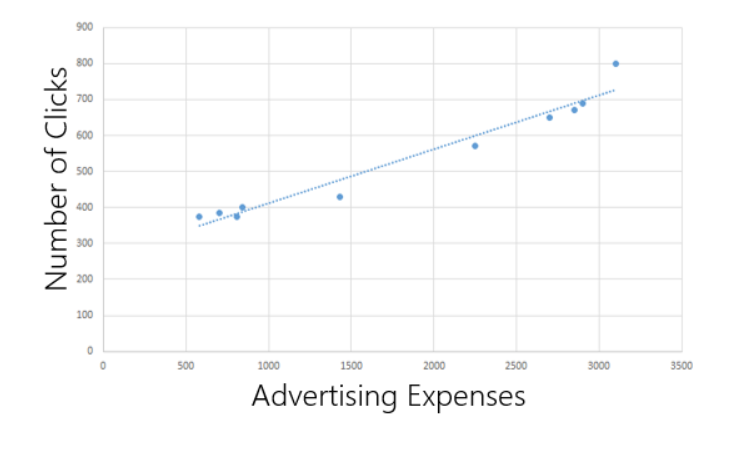

In [ ]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

In [ ]:
def out_y_hat(self, input_x):

    y_hat_row = []

    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1 * input_x[i]
        y_hat_row.append(y_hat)
        
    return y_hat_row

Y_pred.y_hat = out_y_hat

In [ ]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

In [ ]:
x = [1000, 2000]
Y_pred_C.y_hat(input_x = x)

[2001, 4001]

In [ ]:
x = [580, 700, 810, 840]
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

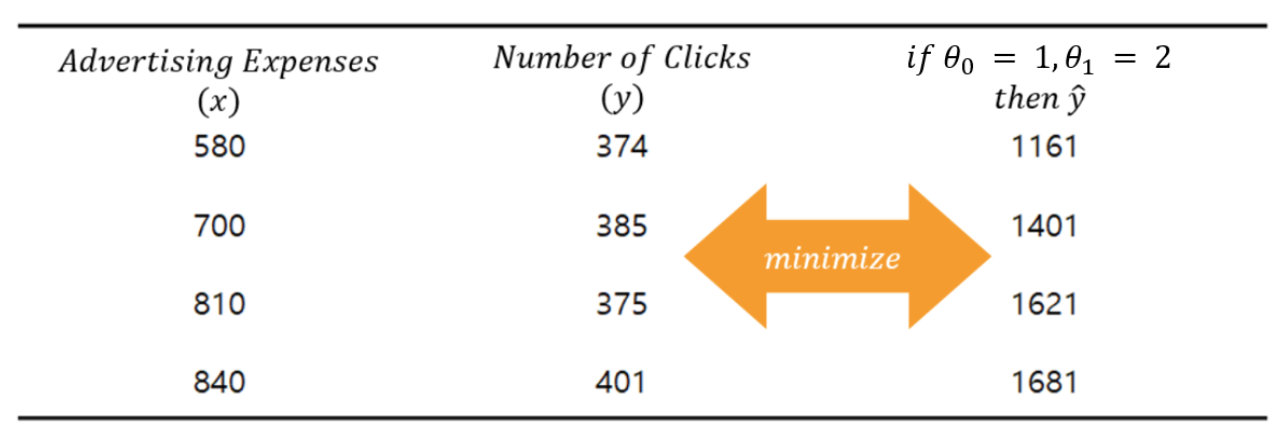

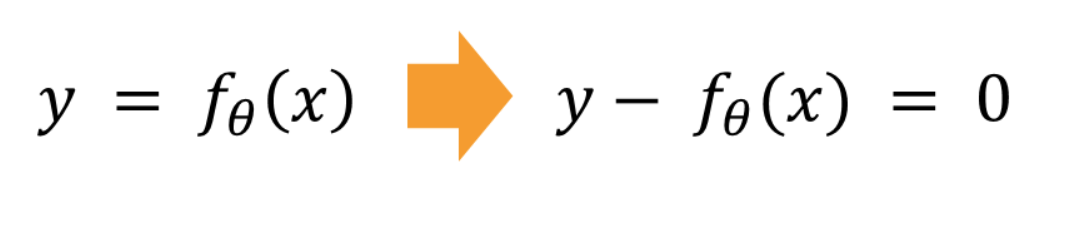

- 평균 오차제곱(MSE, Mean Squared Error)

목적함수 : 어떠한 값을 낮추거나 높이는데 목적이 있다..?   

- 오차제곱합(SSE, Sum of Squared Error)

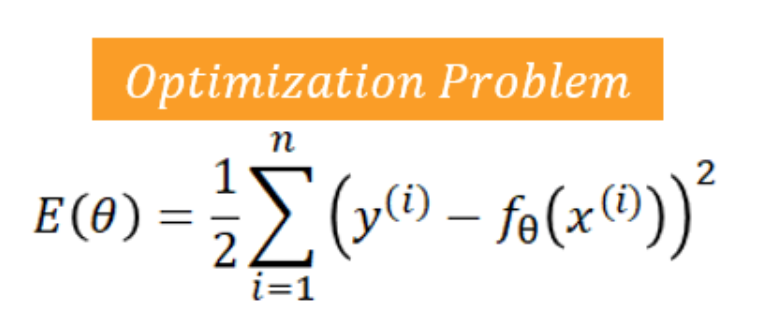

In [ ]:
import numpy as np

y_label_total = [374, 385, 375, 401]
y_hat_total   = [1161, 1401, 1621, 1681]

diff_row = []
for i in range(len(y_label_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("Diff : {} \nSquare : {} \nSSE : {}".format(diff_row, square, sse))
y_hat_total = [1161, 1401, 1621, 1681]

Diff : [-787, -1016, -1246, -1280] 
Square : [ 619369 1032256 1552516 1638400] 
SSE : 2421270.5


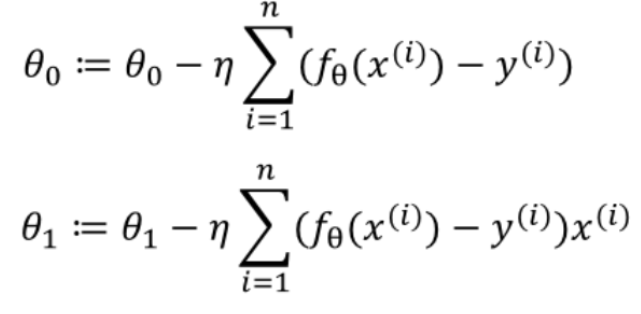

## 경사하강법 (Gradient Descent)



**Process**

1. 학습하고자 하는 가설(Hypothesis)을 수학적 표현식으로 나타냅니다.
2. 가설의 성능을 측정할 수 있는 손실함수(Cost Function 혹은 Loss Function)을 정의합니다.
3. 손실함수를 최소화 할 수 있는 알고리즘을 설계합니다.

**경사하강법**이란  cost 비용을 최소화 하기 위한 최적화 알고리즘이다. 최적화란 여러 가지 허용되는 값들 중에서 주어진 기준을 가장 잘 만족하는 것을 선택하는 것이다. 해당 함수의 최솟값 위치를 찾기 위해 비용함수의 기울기 반대 방향으로 정의한 Step Size를 가지고 조금씩 움직이면서 최적의 파라미터를 찾는 과정이라고 할 수 있다.



즉,  경사하강법은 기울기로 함수의 최솟값을 찾는 방법이다. 특히나 신경망에서 오류역전파(Backpropagation)를 수행 할 때 오류의 최솟값을 찾는데 사용된다. 



여기서 기울기(Gradient)는 파라미터에 대해 편미분한 벡터를 의미하며, 이 파라미터를 반복적으로 조금씩 움직이는 것이 관건이다. 이 때 머신러닝에서는 가장 간단한 모델인 선형 회귀(Linear Regression)가 대표적이다. 


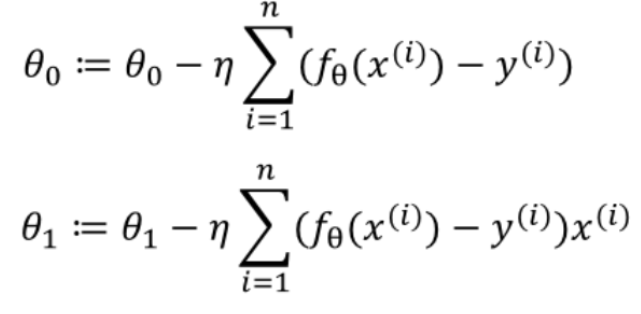

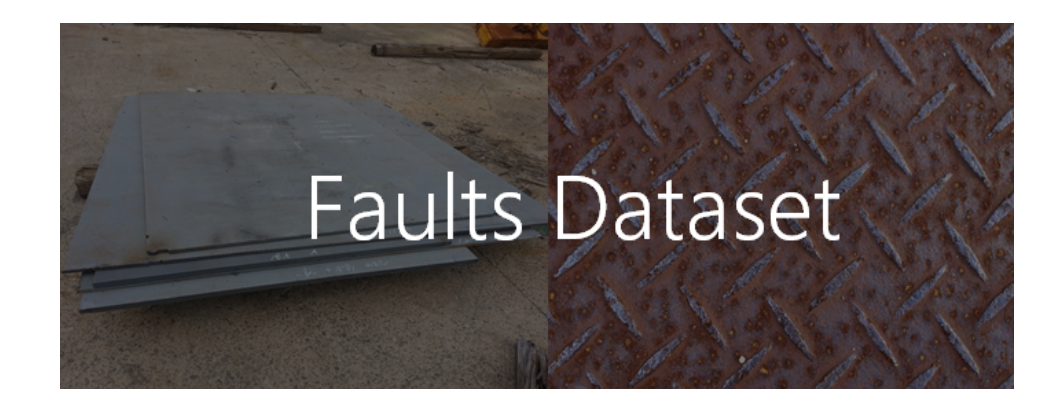

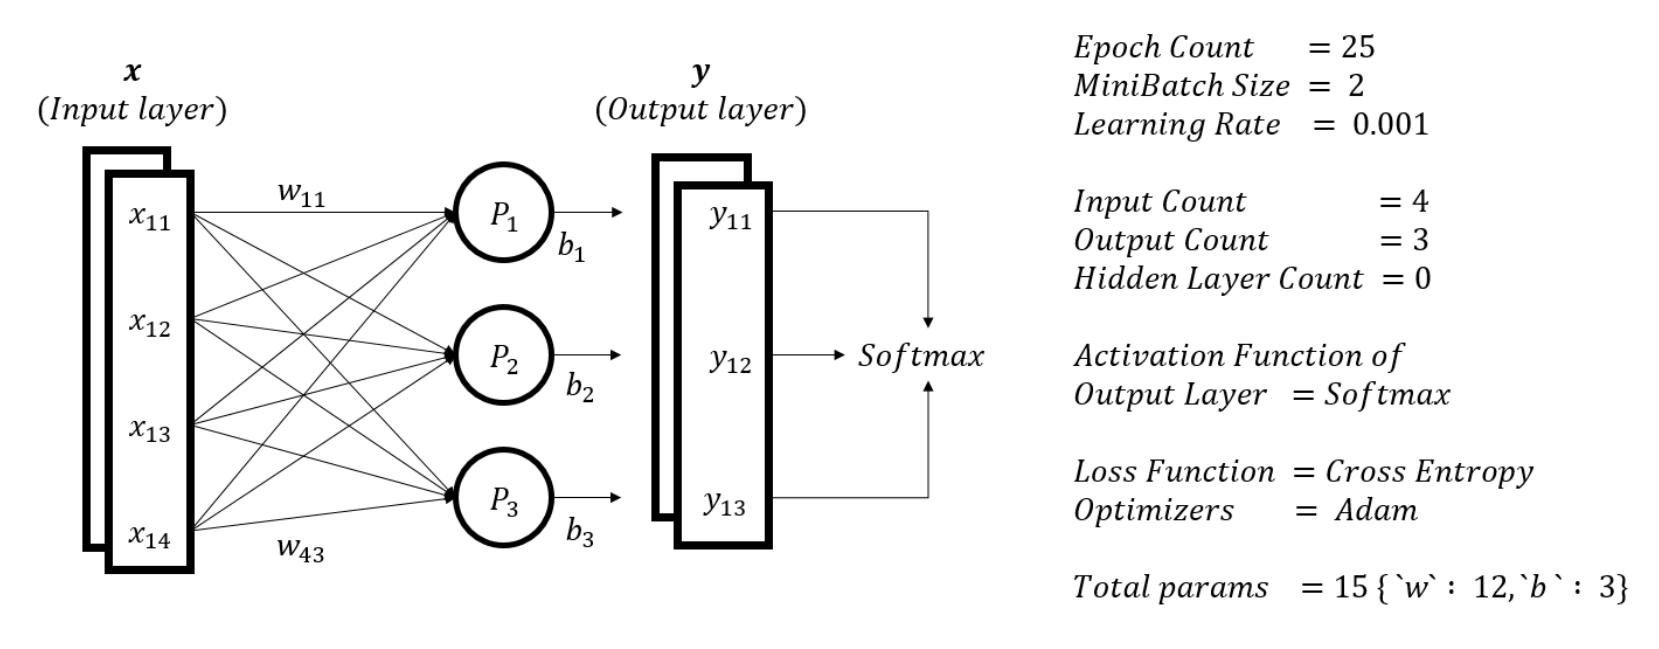

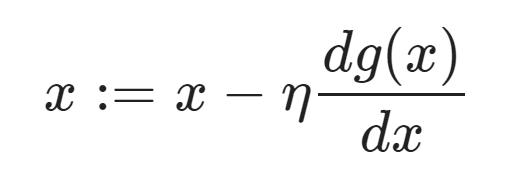

학습률 (Learning_rate (lr))

- 양의 값, 텐서플로우에서는 디폴트값 0.001
- 값의 갱신 보폭(폭)을 제어하는 역할


$$ g(x) = (x-1)^2 $$
$$ = x^2 - 2x + 1 $$

<br>

$$ \frac {dg(x)}{dx} = 2x - 2 $$

x값은  : 3

lr     : 1

값의 갱신 횟수(반복) : 3~4

In [ ]:
def g(x, learning_rate):
    print("Now X value : {}".format(x))
    print("Learning_rate : {}".format(learning_rate))

    epoch_1_x = x - learning_rate*((2*x)-2)
    print("Epoch 1 - x : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - learning_rate*((2*epoch_1_x)-2)
    print("Epoch 2 - x : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - learning_rate*((2*epoch_2_x)-2)
    print("Epoch 3 - x : {}".format(epoch_3_x))

    epoch_4_x = epoch_3_x - learning_rate*((2*epoch_3_x)-2)
    print("Epoch 4 - x : {}".format(epoch_4_x))

g(x = 3, learning_rate = 0.1)

Now X value : 3
Learning_rate : 0.1
Epoch 1 - x : 2.6
Epoch 2 - x : 2.2800000000000002
Epoch 3 - x : 2.024
Epoch 4 - x : 1.8192


In [ ]:
def g(learning_rate, epoch_count, random_value_bool = False, x = 3) :
    if random_value_bool :
        x = np.random.noraml(0.1, size = 1)
    
    print("Now X value : {}".format(x))
    print("Learning_rate : {}".format(learning_rate))

    x_row = []

    for i in range(epoch_count) :
        x = x - learning_rate * ((2*x) - 2)
        print("Epoch : {} - x : {}".format(i+1, np.round(x, 3)))
        x_row.append(x)
    return x_row

In [ ]:
result = g(learning_rate = 0.01, epoch_count = 40, x = 3)

Now X value : 3
Learning_rate : 0.01
Epoch : 1 - x : 2.96
Epoch : 2 - x : 2.921
Epoch : 3 - x : 2.882
Epoch : 4 - x : 2.845
Epoch : 5 - x : 2.808
Epoch : 6 - x : 2.772
Epoch : 7 - x : 2.736
Epoch : 8 - x : 2.702
Epoch : 9 - x : 2.667
Epoch : 10 - x : 2.634
Epoch : 11 - x : 2.601
Epoch : 12 - x : 2.569
Epoch : 13 - x : 2.538
Epoch : 14 - x : 2.507
Epoch : 15 - x : 2.477
Epoch : 16 - x : 2.448
Epoch : 17 - x : 2.419
Epoch : 18 - x : 2.39
Epoch : 19 - x : 2.362
Epoch : 20 - x : 2.335
Epoch : 21 - x : 2.309
Epoch : 22 - x : 2.282
Epoch : 23 - x : 2.257
Epoch : 24 - x : 2.232
Epoch : 25 - x : 2.207
Epoch : 26 - x : 2.183
Epoch : 27 - x : 2.159
Epoch : 28 - x : 2.136
Epoch : 29 - x : 2.113
Epoch : 30 - x : 2.091
Epoch : 31 - x : 2.069
Epoch : 32 - x : 2.048
Epoch : 33 - x : 2.027
Epoch : 34 - x : 2.006
Epoch : 35 - x : 1.986
Epoch : 36 - x : 1.966
Epoch : 37 - x : 1.947
Epoch : 38 - x : 1.928
Epoch : 39 - x : 1.91
Epoch : 40 - x : 1.891


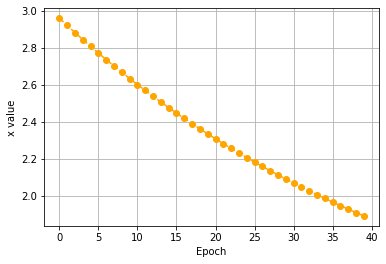

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result, '--o', color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("x value")
plt.grid()
plt.show()

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2994 - accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1452 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0755 - accuracy: 0.9777


[0.07550927251577377, 0.9776999950408936]

$$ E(\theta) = \frac{1}{2} \sum_{i=1}^n (y^{(i)} - f_\theta(x^{(i)})^2 $$

$$ f_\theta(x) = \theta_0 + \theta_1x $$

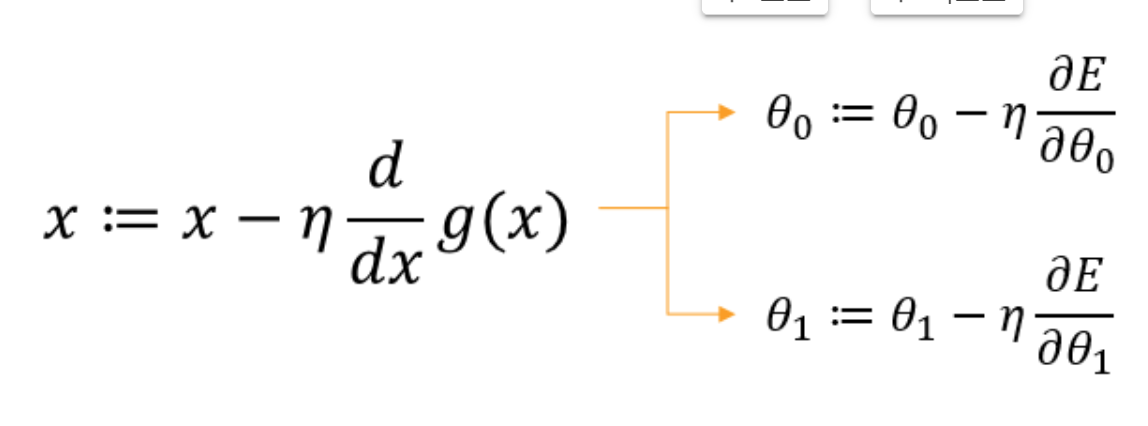

$$ u = E(\theta) $$
$$ v = f_\theta(x)$$

u 와 v 로 치환시킨다

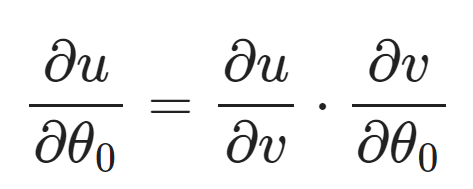

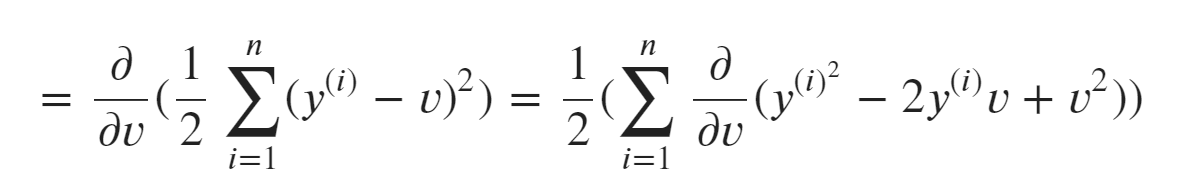

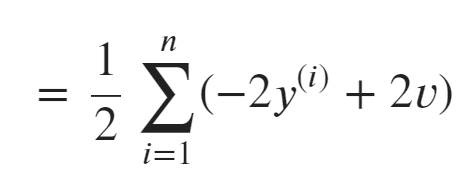

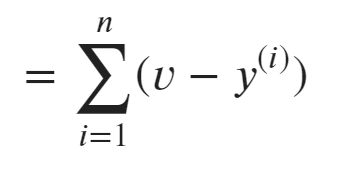

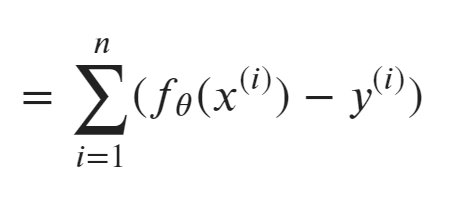

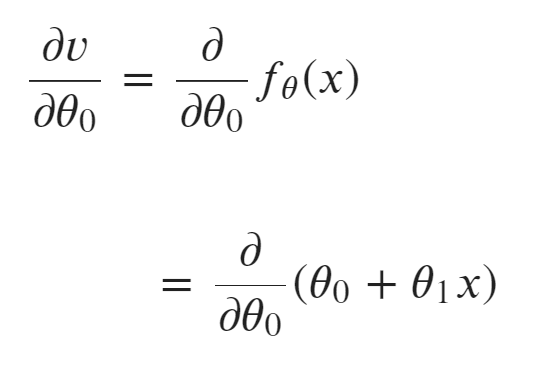

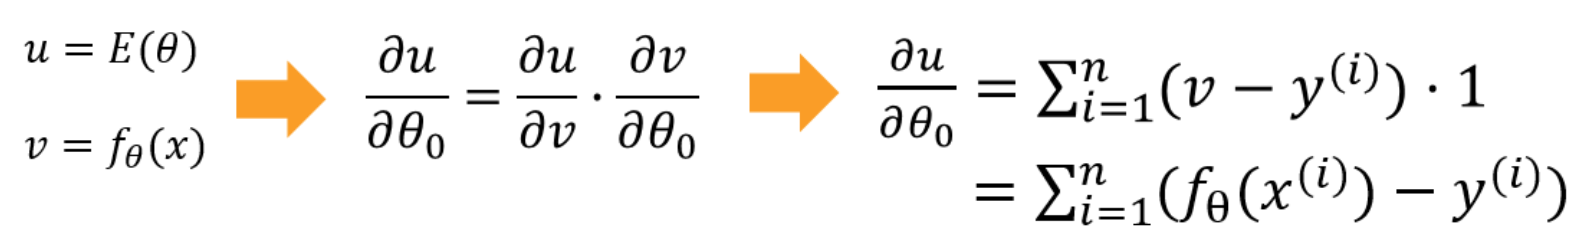

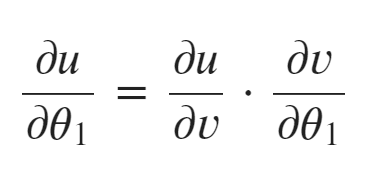

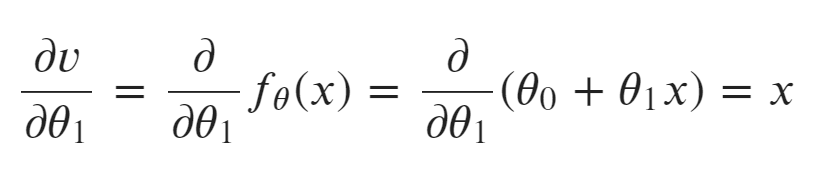

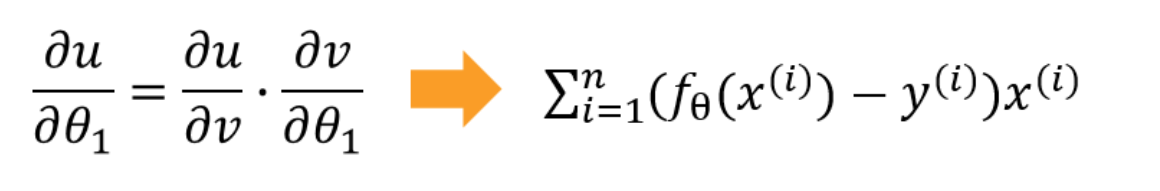

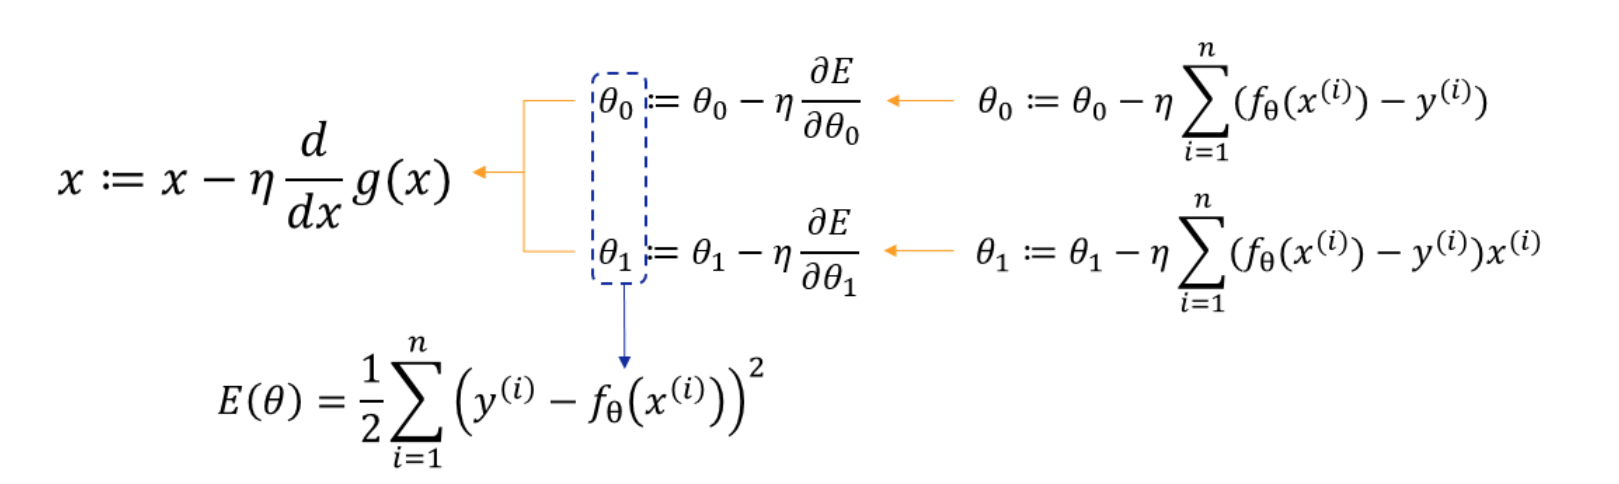

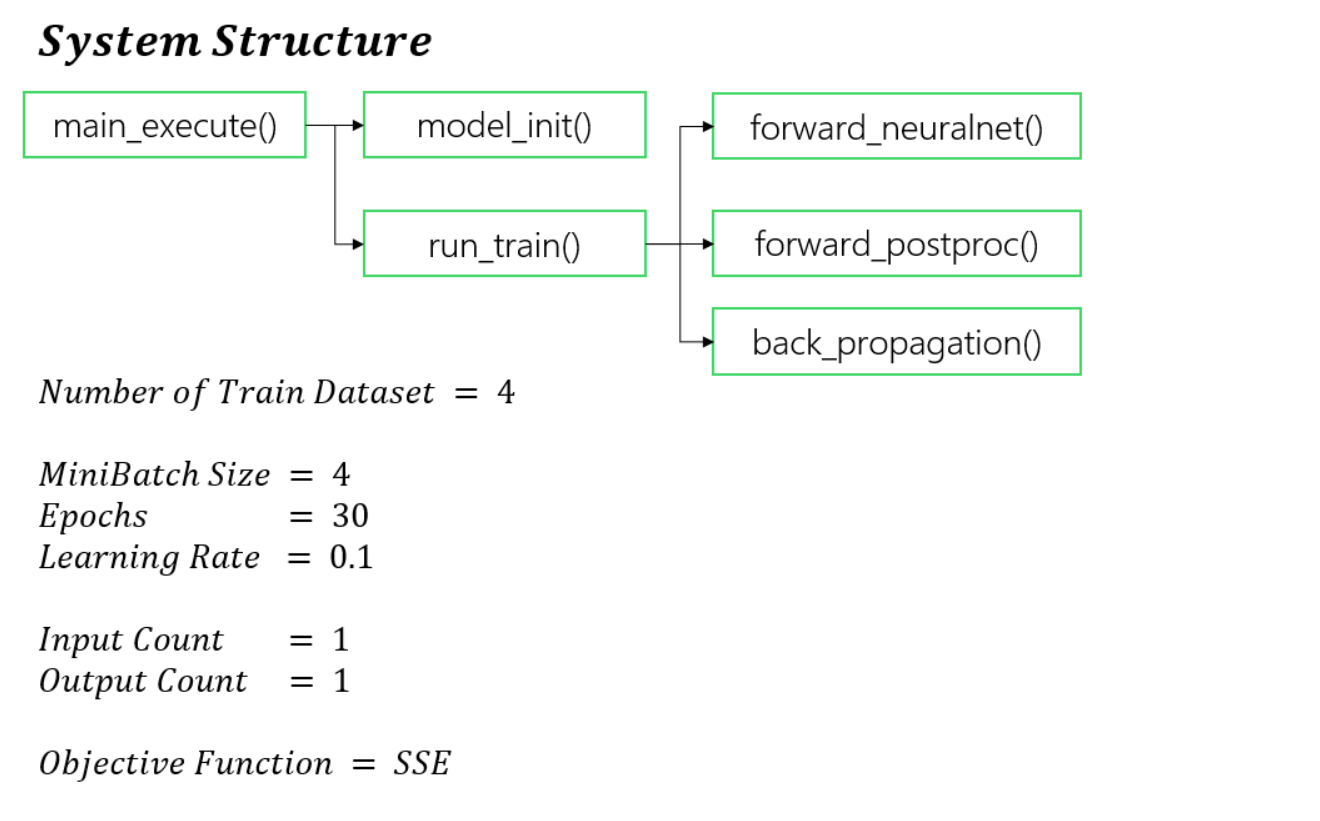

1. Y_hat 값을 먼저 구한다. (x와 theta)
2. SSE 값을 함수로 구현
3. theta값 갱신

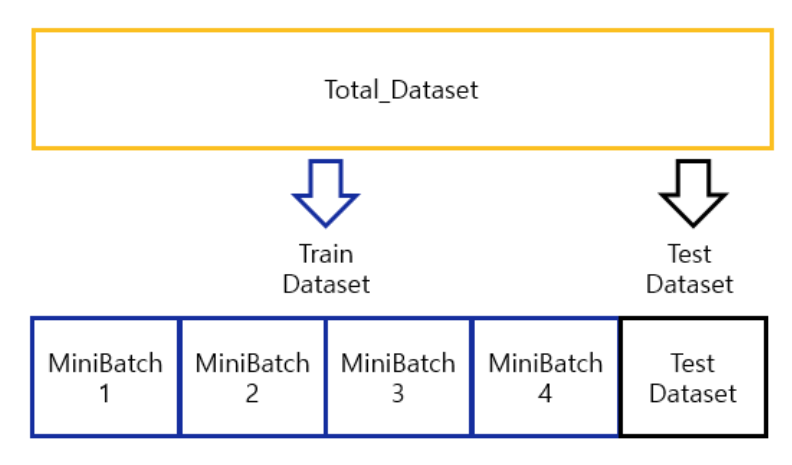

Train Dataset (학습용 데이터셋)   
Test Dataset (테스트용 데이터셋)



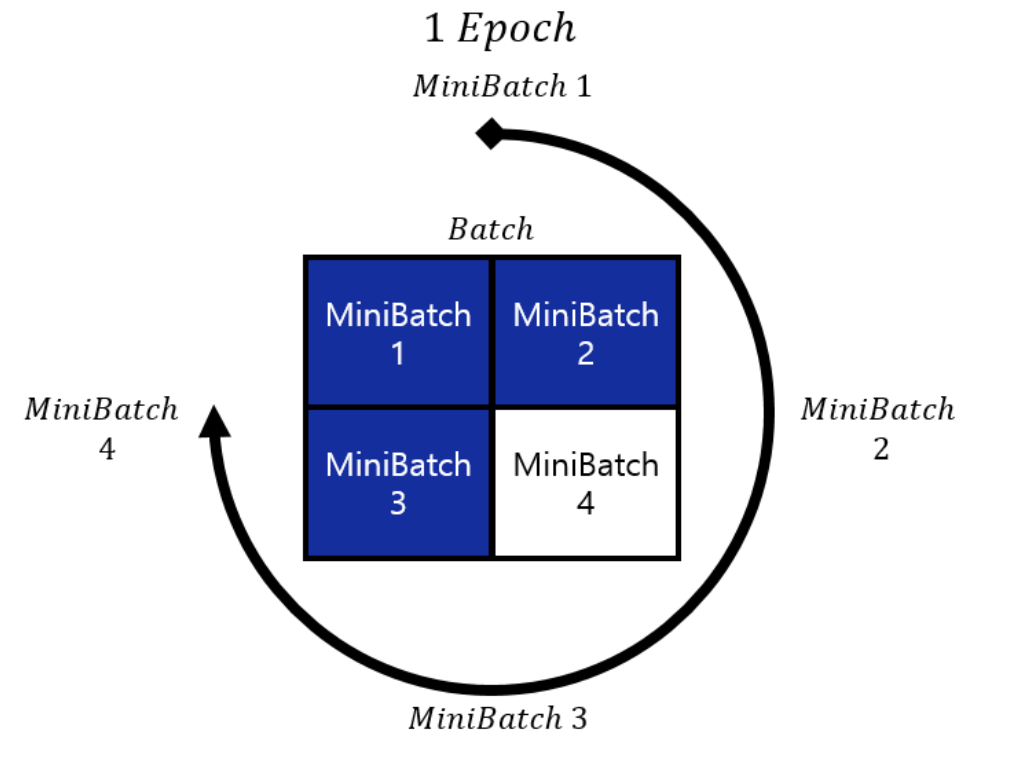

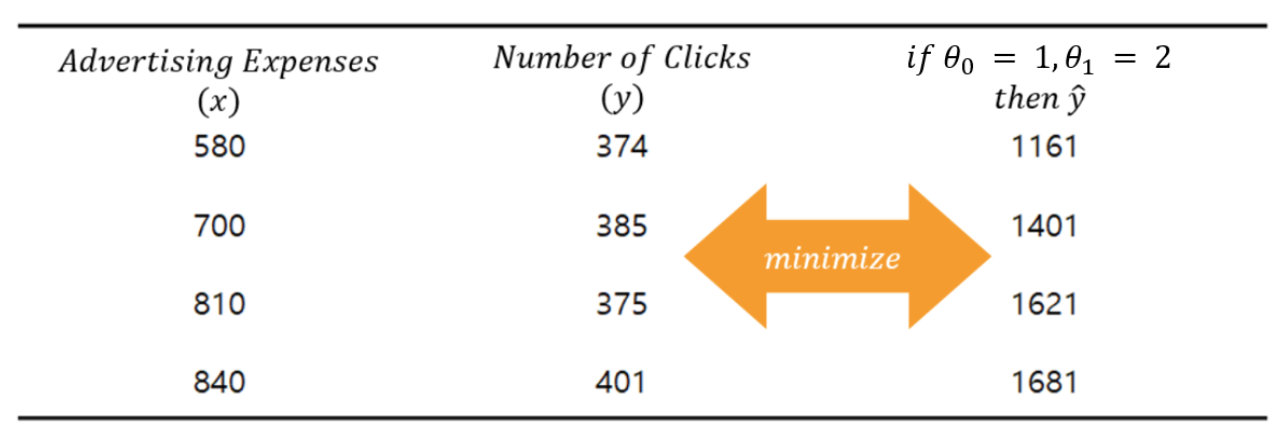

In [ ]:
# main_execute()

import numpy as np

####################### 수정 불가 ###########################
x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

# 독립변수와 종속변수
input_cnt, output_cnt = 1, 1
####################### 수정 불가 ###########################

RND_MEAN, RND_STD     = 0, 1

# 무작위 함수를 사용하여 theta값

RND_MEAN, RND_STD = 0, 1

def main_execute(x, y, epoch_count, report, lr = 0.001) :
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, lr, report)

    return sse_row, theta_0_row, theta_1_row

# 초기 함수 : theta_0, theta_1 값을 무작위로 추첨

def model_init() :
    global theta_0, theta_1 # 전역변수화 : 바로 메모리에 저장됨, 프로그램 전체에서 유효
    theta_0 = np.random.normal(RND_MEAN, 
                               RND_STD, 
                               size = [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, 
                               RND_STD, 
                               size = [input_cnt, output_cnt])


def forward_neuralnet(input_x) :
    y_hat = theta_0 + (theta_1 * input_x)
    return y_hat

def forward_postproc(output, y) : # 실제값과 예측값
    diff = output - y
    square = np.square(diff)    # 제곱
    sse = 1/2 * np.sum(square) # 1/2 * 시그마 처리

    return sse

def back_propagation(lr, y_hat) : # learning rate, y_hat
    global theta_0, theta_1     # 전역변수화
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum((y_hat - y_label_total) * x))

def run_train(x, y, epoch_count, report, lr = 0.001) :
    print("inital theta_0 : {}".format(theta_0))
    print("inital theta_1 : {}".format(theta_1))
    sse_row = []
    theta_0_row, theta_1_row = [], []

    for epoch in range(epoch_count) :
        y_hat = forward_neuralnet(x)    # y_hat 값 반환
        sse = forward_postproc(y_hat, y_label_total)   # sse 값 반환

        sse_row.append(sse) # 반환한 sse값 저장
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        back_propagation(lr, y_hat) # 갱신

        if report > 0 and epoch % report == 0 :
            print("Epoch - {}".format(epoch + 1))
            print("SSE : {}".format(sse))
    print("="*40)
    print("Final SSE : {}".format(sse))

    return sse_row, theta_0_row, theta_1_row

sse_row, theta_0_row, theta_1_row = main_execute(x = x,
                                                 y = y_label_total, 
                                                 epoch_count = 10, 
                                                 lr = 0.0000001, 
                                                 report = 2)


inital theta_0 : [-0.80854464]
inital theta_1 : [[0.78332335]]
Epoch - 1
SSE : 82641.0781854195
Final SSE : 2.706434845303954e+124


In [ ]:
import numpy as np

###############수정 불가#########################
x             = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

input_cnt, output_cnt = 1, 1
#######################################################


RND_MEAN, RND_STD     = 0, 1


def main_execute(x, y, epoch_count, report, lr = 0.001):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, lr, report)
    
    return sse_row, theta_0_row, theta_1_row

def model_init():
    global theta_0, theta_1 
    theta_0 = np.random.normal(RND_MEAN, 
                               RND_STD, 
                               size = [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, 
                               RND_STD, 
                               size = [input_cnt, output_cnt])
    
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x
    return y_hat 

def forward_postproc(output, y):
    diff   = output - y
    square = np.square(diff) 
    sse    = 1/2 * np.sum(square)

    return sse

def back_propagation(lr, y_hat):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x)

def run_train(x, y, epoch_count, lr, report):
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))
    sse_row = []
    theta_0_row, theta_1_row = [], []

    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat, y_label_total)

        sse_row.append(sse)

        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)
        
        back_propagation(lr, y_hat)

        if report > 0 and epoch % report == 0:
            print("Epoch - {}".format(epoch + 1))
            print("SSE : {}".format(sse))
    print("=============================")
    print("Final SSE : {}".format(sse))

    return sse_row, theta_0_row, theta_1_row

sse_row, theta_0_row, theta_1_row = main_execute(x = x, 
                                                 y = y_label_total, 
                                                 epoch_count = 10, 
                                                 report = 2,
                                                 lr = 0.0000001)

Initial theta_0 : [-1.53085137]
Initial theta_1 : [[-0.45133062]]
Epoch - 1
SSE : 1030653.8197067484
Epoch - 3
SSE : 382798.4172052803
Epoch - 5
SSE : 151255.3984255472
Epoch - 7
SSE : 70961.72799775943
Epoch - 9
SSE : 44681.834688534465
Final SSE : 39638.773157347685


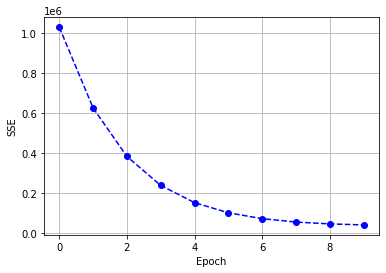

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [ ]:
epoch_count = 10
report = 3

for epoch in range(epoch_count) :
    print(epoch % report == 0)

True
False
False
True
False
False
True
False
False
True
